In [29]:
from scipy.sparse import coo_matrix
import bioframe as bf
import bioframe.vis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
%matplotlib inline

from collections import Counter
import itertools
import sys
from collections import OrderedDict
import random
import seaborn as sns
import scipy
import pickle

import bioframe as bf
import bioframe.vis


# tobias

In [30]:
#ATACorrect

# hg38 = '/hg38.fa'
# bam = '/Mp.nodups.mapq30.t2.sorted.reducedchroms.bam'
# peaks='/G1peaks.sorted.bed'
# outdir='/atacorrect'
# blacklist='/hg38-blacklist.bed'
# !bsub -q long -W 24:00 -n 10 -R "span[hosts=1]" -R "rusage[mem=8000]" \
#         "source activate tobias2; TOBIAS ATACorrect -b $bam -g $hg38 --blacklist $blacklist -p $peaks --outdir $outdir"


In [31]:
#footprint scores

# correctedbw = '/Mp.nodups.mapq30.t2.sorted.reducedchroms.atacorrect.bw'
# peaks='/G1peaks.sorted.bed'
# outfile='/bwscore/Mp.atacorrect.scored.bw'
# !bsub -q long -W 24:00 -n 10 -R "span[hosts=1]" -R "rusage[mem=8000]" \
#         "source activate tobias2; TOBIAS ScoreBigwig -s $correctedbw -r $peaks -o $outfile"


In [32]:
#footprint motif analysis, added outpeaks (regions) for MCDs, otherwise omit outpeaks, can have norm off or on

# bw1 = '/Mp.atacorrect.scored.bw'
# bw2 = '/mGp.atacorrect.scored.bw'
# bw3 = '/pGp.atacorrect.scored.bw'
# motifs='/jasper.motifs'
# hg38 = '/hg38.fa'
# peaks='/G1peaks.sorted.bed'
# outpeaks='/G1peaks_atMCD.sorted.bed'
# outdir='/bindetect'
# !bsub -q long -W 12:00 -n 8 -R "span[hosts=1]" -R "rusage[mem=8000]" -o out.%J -e err.%J\
#         "source activate tobias2; TOBIAS BINDetect --signals $bw1 $bw2 $bw3 --peaks $peaks --output-peaks $outpeaks --motifs $motifs --genome $hg38 --outdir $outdir --cond_names Mp mGp pGp"
  

# comparing all to id

# plotting fottprint score ratios


In [33]:
#all
tb_all=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/tobias/240212/bindetect_allG1peaks/bindetect_results.txt', sep='\t')
tb_all['_Mp_mGp_change']=-1*tb_all['Mp_mGp_change']
tb_all['_Mp_pGp_change']=-1*tb_all['Mp_pGp_change']
tb_all['_mGp_pGp_change']=-1*tb_all['mGp_pGp_change']
tb_all


,output_prefix,name,motif_id,cluster,total_tfbs,Mp_mean_score,Mp_bound,mGp_mean_score,mGp_bound,pGp_mean_score,...,Mp_pGp_change,Mp_pGp_pvalue,mGp_pGp_change,mGp_pGp_pvalue,Mp_mGp_highlighted,Mp_pGp_highlighted,mGp_pGp_highlighted,_Mp_mGp_change,_Mp_pGp_change,_mGp_pGp_change
0,Arnt_MA0004.1,Arnt,MA0004.1,C_MYC,15950,0.34859,4453,0.32758,4813,0.37824,...,-0.14472,1.025080e-124,-0.12555,1.087850e-118,False,False,False,-0.03861,0.14472,0.12555
1,AhrArnt_MA0006.1,Ahr::Arnt,MA0006.1,C_Ahr::Arnt,21619,0.33392,6170,0.29803,5679,0.35624,...,-0.14771,3.260970e-130,-0.31510,1.021810e-162,False,False,False,-0.26543,0.14771,0.31510
2,Ddit3Cebpa_MA0019.1,Ddit3::Cebpa,MA0019.1,C_Ddit3::Cebpa,15447,0.16866,1864,0.19778,2303,0.15642,...,0.07330,4.468410e-97,0.21578,3.594410e-143,False,False,False,0.19326,-0.07330,-0.21578
3,Mecom_MA0029.1,Mecom,MA0029.1,C_Mecom,25168,0.13774,2181,0.17716,3303,0.12395,...,0.09637,5.671120e-121,0.31680,4.625240e-172,False,False,False,0.30541,-0.09637,-0.31680
4,FOXF2_MA0030.1,FOXF2,MA0030.1,C_Foxj3,30458,0.16351,3526,0.21178,5242,0.14686,...,0.13318,2.048670e-136,0.39537,6.632390e-183,False,False,False,0.38431,-0.13318,-0.39537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,ZNF281_MA1630.2,ZNF281,MA1630.2,C_ZNF281,108154,0.44091,40158,0.32722,32374,0.46276,...,-0.13718,2.121680e-165,-0.55492,2.099810e-225,True,False,True,-0.55339,0.13718,0.55492
837,BACH1_MA1633.2,BACH1,MA1633.2,C_FOSL1::JUN,61617,0.24708,12846,0.35393,19839,0.21937,...,0.22097,3.039330e-176,0.75155,7.305380e-229,True,True,True,0.83187,-0.22097,-0.75155
838,Prdm4_MA1647.2,Prdm4,MA1647.2,C_Prdm4,22407,0.18773,3092,0.20999,3682,0.17769,...,0.07484,2.293820e-103,0.17642,4.851630e-140,False,False,False,0.14273,-0.07484,-0.17642
839,THAP1_MA0597.2,THAP1,MA0597.2,C_THAP1,53352,0.29575,13449,0.28527,13336,0.28314,...,0.04720,1.651610e-101,-0.03745,2.081580e-91,False,False,False,-0.10336,-0.04720,0.03745


In [34]:
#all MCD
tb_id=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/tobias/240212/new_G1vert/allG1_id/bindetect_results.txt', sep='\t')
tb_id['_Mp_mGp_change']=-1*tb_id['Mp_mGp_change']
tb_id['_Mp_pGp_change']=-1*tb_id['Mp_pGp_change']
tb_id['_mGp_pGp_change']=-1*tb_id['mGp_pGp_change']
tb_id

,output_prefix,name,motif_id,cluster,total_tfbs,Mp_mean_score,Mp_bound,mGp_mean_score,mGp_bound,pGp_mean_score,...,Mp_pGp_change,Mp_pGp_pvalue,mGp_pGp_change,mGp_pGp_pvalue,Mp_mGp_highlighted,Mp_pGp_highlighted,mGp_pGp_highlighted,_Mp_mGp_change,_Mp_pGp_change,_mGp_pGp_change
0,Arnt_MA0004.1,Arnt,MA0004.1,C_MYC,2151,0.70111,1152,0.57097,1030,0.70998,...,-0.10714,5.580810e-71,-0.41408,7.830310e-129,False,False,False,-0.37029,0.10714,0.41408
1,AhrArnt_MA0006.1,Ahr::Arnt,MA0006.1,C_Ahr::Arnt,3155,0.61817,1605,0.48580,1231,0.63539,...,-0.09058,2.802150e-70,-0.61934,5.921660e-152,False,False,False,-0.60130,0.09058,0.61934
2,Ddit3Cebpa_MA0019.1,Ddit3::Cebpa,MA0019.1,C_Ddit3::Cebpa,1865,0.31021,451,0.29852,427,0.32272,...,-0.08761,6.635360e-59,-0.17280,1.785940e-87,False,False,False,-0.13302,0.08761,0.17280
3,Mecom_MA0029.1,Mecom,MA0029.1,C_Mecom,2953,0.25629,574,0.27512,591,0.28100,...,-0.14950,5.224110e-98,-0.12597,7.788930e-91,False,False,False,-0.02954,0.14950,0.12597
4,FOXF2_MA0030.1,FOXF2,MA0030.1,C_Foxj3,3570,0.30720,878,0.32897,950,0.33140,...,-0.16639,5.256290e-103,-0.08217,2.189470e-73,False,False,False,0.03855,0.16639,0.08217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,ZNF281_MA1630.2,ZNF281,MA1630.2,C_ZNF281,18470,0.76125,10938,0.50141,7762,0.71993,...,0.00845,2.404540e-28,-0.84696,2.341250e-209,True,False,True,-0.89720,-0.00845,0.84696
837,BACH1_MA1633.2,BACH1,MA1633.2,C_FOSL1::JUN,6020,0.49868,2477,0.63172,3091,0.52019,...,-0.14939,4.217310e-108,0.40312,7.060330e-151,True,False,True,0.64176,0.14939,-0.40312
838,Prdm4_MA1647.2,Prdm4,MA1647.2,C_Prdm4,2782,0.35084,794,0.31917,704,0.36191,...,-0.06479,3.131140e-56,-0.26306,9.582130e-116,False,False,False,-0.25283,0.06479,0.26306
839,THAP1_MA0597.2,THAP1,MA0597.2,C_THAP1,6750,0.57266,3233,0.47582,2651,0.54386,...,0.08171,1.605060e-87,-0.31438,1.125080e-144,False,True,False,-0.42778,-0.08171,0.31438


In [35]:
#G1 MCD

tb_5h=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/tobias/240212/new_G1vert/allG1_g1/bindetect_results.txt', sep='\t')
tb_5h['_Mp_mGp_change']=-1*tb_5h['Mp_mGp_change']
tb_5h['_Mp_pGp_change']=-1*tb_5h['Mp_pGp_change']
tb_5h['_mGp_pGp_change']=-1*tb_5h['mGp_pGp_change']
tb_5h


,output_prefix,name,motif_id,cluster,total_tfbs,Mp_mean_score,Mp_bound,mGp_mean_score,mGp_bound,pGp_mean_score,...,Mp_pGp_change,Mp_pGp_pvalue,mGp_pGp_change,mGp_pGp_pvalue,Mp_mGp_highlighted,Mp_pGp_highlighted,mGp_pGp_highlighted,_Mp_mGp_change,_Mp_pGp_change,_mGp_pGp_change
0,Arnt_MA0004.1,Arnt,MA0004.1,C_MYC,1049,0.67442,536,0.55769,491,0.71418,...,-0.19050,5.314150e-85,-0.45120,6.553910e-122,False,False,False,-0.34835,0.19050,0.45120
1,AhrArnt_MA0006.1,Ahr::Arnt,MA0006.1,C_Ahr::Arnt,1672,0.57262,800,0.45211,603,0.61466,...,-0.15402,2.341500e-84,-0.65819,4.630820e-145,False,False,False,-0.61092,0.15402,0.65819
2,Ddit3Cebpa_MA0019.1,Ddit3::Cebpa,MA0019.1,C_Ddit3::Cebpa,1022,0.27591,219,0.27797,222,0.30296,...,-0.13485,5.805600e-69,-0.17974,6.195630e-81,False,False,False,-0.10396,0.13485,0.17974
3,Mecom_MA0029.1,Mecom,MA0029.1,C_Mecom,1638,0.23575,281,0.25712,297,0.26147,...,-0.17654,6.567140e-93,-0.11868,3.306350e-76,False,False,False,-0.00053,0.17654,0.11868
4,FOXF2_MA0030.1,FOXF2,MA0030.1,C_Foxj3,2002,0.27301,434,0.29581,476,0.30199,...,-0.18715,1.283090e-91,-0.10230,2.869030e-65,False,False,False,0.03096,0.18715,0.10230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,ZNF281_MA1630.2,ZNF281,MA1630.2,C_ZNF281,9188,0.73190,5293,0.48383,3673,0.73570,...,-0.11119,8.878300e-104,-0.95606,1.116780e-196,True,False,True,-0.92964,0.11119,0.95606
837,BACH1_MA1633.2,BACH1,MA1633.2,C_FOSL1::JUN,3365,0.44272,1259,0.58234,1611,0.46885,...,-0.16562,8.407250e-99,0.43294,2.097950e-140,True,False,True,0.70092,0.16562,-0.43294
838,Prdm4_MA1647.2,Prdm4,MA1647.2,C_Prdm4,1480,0.31300,367,0.29401,331,0.34196,...,-0.11041,4.052430e-70,-0.28179,7.818650e-109,False,False,False,-0.23988,0.11041,0.28179
839,THAP1_MA0597.2,THAP1,MA0597.2,C_THAP1,3361,0.53197,1540,0.44785,1237,0.53320,...,-0.00737,7.176800e-06,-0.36645,1.399290e-131,False,True,False,-0.41189,0.00737,0.36645


In [36]:
#cyto MCD
tb_cyto=pd.read_csv('/home/allana.schooley-umw/as38w/Ranger/atac/tobias/240212/new_G1vert/allG1_cyto/bindetect_results.txt', sep='\t')
tb_cyto['_Mp_mGp_change']=-1*tb_cyto['Mp_mGp_change']
tb_cyto['_Mp_pGp_change']=-1*tb_cyto['Mp_pGp_change']
tb_cyto['_mGp_pGp_change']=-1*tb_cyto['mGp_pGp_change']
tb_cyto.columns


Index(['output_prefix', 'name', 'motif_id', 'cluster', 'total_tfbs',
       'Mp_mean_score', 'Mp_bound', 'mGp_mean_score', 'mGp_bound',
       'pGp_mean_score', 'pGp_bound', 'Mp_mGp_change', 'Mp_mGp_pvalue',
       'Mp_pGp_change', 'Mp_pGp_pvalue', 'mGp_pGp_change', 'mGp_pGp_pvalue',
       'Mp_mGp_highlighted', 'Mp_pGp_highlighted', 'mGp_pGp_highlighted',
       '_Mp_mGp_change', '_Mp_pGp_change', '_mGp_pGp_change'],
      dtype='object')

Text(0.5, 0, 'mG1 vs M 5h specific')

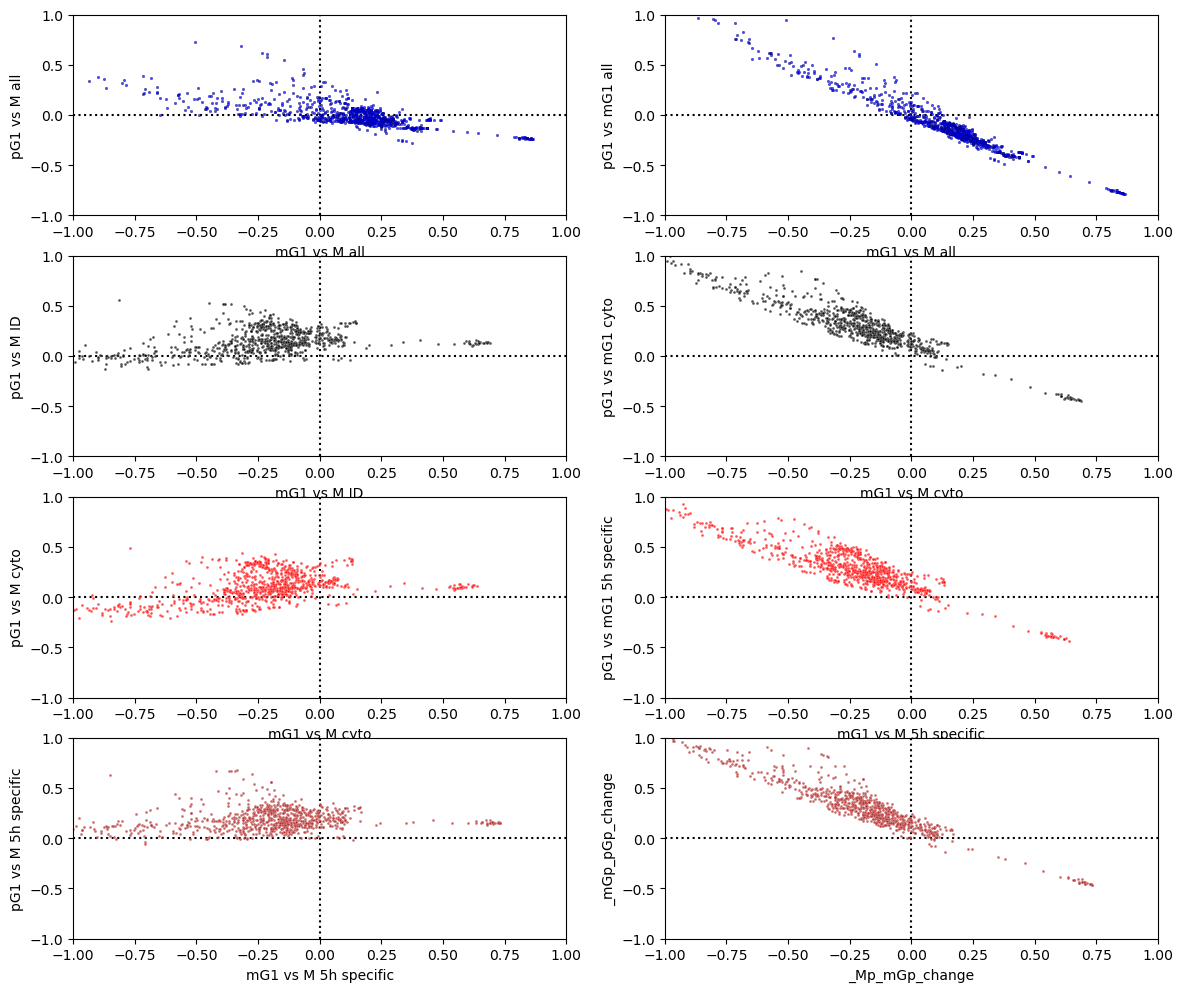

In [37]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2,figsize=(14, 12))

sns.scatterplot(data=tb_all, x="_Mp_mGp_change", y="_Mp_pGp_change",ax=ax1,alpha=0.7,legend=False,s=4,color='blue',edgecolor='k')
sns.scatterplot(data=tb_all, x="_Mp_mGp_change", y="_mGp_pGp_change",ax=ax2,alpha=0.7,s=4,color='blue',edgecolor='k')

sns.scatterplot(data=tb_id, x="_Mp_mGp_change", y="_Mp_pGp_change", ax=ax3,alpha=0.7,legend=False,s=4,color='k')
sns.scatterplot(data=tb_id, x="_Mp_mGp_change", y="_mGp_pGp_change", ax=ax4,alpha=0.7,legend=False,s=4,color='k')

sns.scatterplot(data=tb_cyto, x="_Mp_mGp_change", y="_Mp_pGp_change", ax=ax5,alpha=0.7,legend=False,s=4,color='red')
sns.scatterplot(data=tb_cyto, x="_Mp_mGp_change", y="_mGp_pGp_change", ax=ax6,alpha=0.7,legend=False,s=4,color='red')

sns.scatterplot(data=tb_5h, x="_Mp_mGp_change", y="_Mp_pGp_change", ax=ax7,alpha=0.7,legend=False,s=4,color='firebrick')
sns.scatterplot(data=tb_5h, x="_Mp_mGp_change", y="_mGp_pGp_change", ax=ax8,alpha=0.7,legend=False,s=4,color='firebrick')


for ax in ax1,ax3,ax5,ax7:
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.vlines(0,-1,1,color='k',linestyle=':',zorder=0)
#make yline ratio of G1 tss on vs tss off    
    ax.hlines(0,-1,1,color='k',linestyle=':',zorder=0)

for ax in ax2,ax4,ax6,ax8:
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    # ax.plot([0.05,1.3],[0.05,1.3],color="k",ls=':')
    ax.vlines(0,-1,1,color='k',linestyle=':',zorder=0)
#make yline ratio of G1 tss on vs tss off    
    ax.hlines(0,-1,1,color='k',linestyle=':',zorder=0)

#ax.hlines(0,-0.8,0.8,color='k',linestyle=':',zorder=0)
ax1.set_ylabel('pG1 vs M all')
ax3.set_ylabel('pG1 vs M ID')
ax5.set_ylabel('pG1 vs M cyto')
ax7.set_ylabel('pG1 vs M 5h specific')

ax2.set_ylabel('pG1 vs mG1 all')
ax4.set_ylabel('pG1 vs mG1 cyto')
ax6.set_ylabel('pG1 vs mG1 5h specific')

ax1.set_xlabel('mG1 vs M all')
ax2.set_xlabel('mG1 vs M all')
ax3.set_xlabel('mG1 vs M ID')
ax4.set_xlabel('mG1 vs M ID')
ax4.set_xlabel('mG1 vs M cyto')
ax5.set_xlabel('mG1 vs M cyto')
ax6.set_xlabel('mG1 vs M 5h specific')
ax7.set_xlabel('mG1 vs M 5h specific')




# for ax in ax2,ax4,ax6:
#     ax.set_ylabel('mitotic z-score')


In [38]:
df=pd.DataFrame()
df['name']=tb_all['name']
df['motif_id']=tb_all['motif_id']
df['cluster']=tb_all['cluster']

df['total_tfbs_all']=tb_all['total_tfbs']
df['total_tfbs_id']=tb_id['total_tfbs']
df['total_tfbs_5h']=tb_5h['total_tfbs']
df['total_tfbs_cyto']=tb_cyto['total_tfbs']

df['Mp_all']=tb_all['Mp_mean_score']
df['Mp_id']=tb_id['Mp_mean_score']
df['Mp_5h']=tb_5h['Mp_mean_score']
df['Mp_cyto']=tb_cyto['Mp_mean_score']

df['mGp_all']=tb_all['mGp_mean_score']
df['mGp_id']=tb_id['mGp_mean_score']
df['mGp_5h']=tb_5h['mGp_mean_score']
df['mGp_cyto']=tb_cyto['mGp_mean_score']

df['pGp_all']=tb_all['pGp_mean_score']
df['pGp_id']=tb_id['pGp_mean_score']
df['pGp_5h']=tb_5h['pGp_mean_score']
df['pGp_cyto']=tb_cyto['pGp_mean_score']

df['G1vM']=np.log2(df['mGp_all']/df['Mp_all'])
df['G1vM_id']=np.log2(df['mGp_id']/df['Mp_id'])
df['G1vM_5h']=np.log2(df['mGp_5h']/df['Mp_5h'])
df['G1vM_cyto']=np.log2(df['mGp_cyto']/df['Mp_cyto'])

df['dG1vM']=np.log2(df['pGp_all']/df['Mp_all'])
df['dG1vM_id']=np.log2(df['pGp_id']/df['Mp_id'])
df['dG1vM_5h']=np.log2(df['pGp_5h']/df['Mp_5h'])
df['dG1vM_cyto']=np.log2(df['pGp_cyto']/df['Mp_cyto'])

df['dG1vG1']=np.log2(df['pGp_all']/df['mGp_all'])
df['dG1vG1_id']=np.log2(df['pGp_id']/df['mGp_id'])
df['dG1vG1_5h']=np.log2(df['pGp_5h']/df['mGp_5h'])
df['dG1vG1_cyto']=np.log2(df['pGp_cyto']/df['mGp_cyto'])

df['G1v_dG1']=np.log2(df['mGp_all']/df['pGp_all'])
df['G1v_dG1_id']=np.log2(df['mGp_id']/df['pGp_id'])
df['G1v_dG1_5h']=np.log2(df['mGp_5h']/df['pGp_5h'])
df['G1v_dG1_cyto']=np.log2(df['mGp_cyto']/df['pGp_cyto'])

###
df['change_G1vM_id']=tb_id['_Mp_mGp_change']
df['change_dG1vM_id']=tb_id['_Mp_pGp_change']
df['change_dG1vG1_id']=tb_id['_mGp_pGp_change']

df['change_G1vM_cyto']=tb_cyto['_Mp_mGp_change']
df['change_dG1vM_cyto']=tb_cyto['_Mp_pGp_change']
df['change_dG1vG1_cyto']=tb_cyto['_mGp_pGp_change']

df['change_G1vM_5h']=tb_5h['_Mp_mGp_change']
df['change_dG1vM_5h']=tb_5h['_Mp_pGp_change']
df['change_dG1vG1_5h']=tb_5h['_mGp_pGp_change']

df['change_G1vM_all']=tb_all['_Mp_mGp_change']
df['change_dG1vM_all']=tb_all['_Mp_pGp_change']
df['change_dG1vG1_all']=tb_all['_mGp_pGp_change']

df['diff_G1vM']=df['G1vM']-df['G1vM']
df['diff_G1vM_id']=df['G1vM_id']-df['G1vM']
df['diff_G1vM_5h']=df['G1vM_5h']-df['G1vM']
df['diff_G1vM_cyto']=df['G1vM_cyto']-df['G1vM']

df['diff_dG1vM']=df['dG1vM']-df['dG1vM']
df['diff_dG1vM_id']=df['dG1vM_id']-df['dG1vM']
df['diff_dG1vM_5h']=df['dG1vM_5h']-df['dG1vM']
df['diff_dG1vM_cyto']=df['dG1vM_cyto']-df['dG1vM']

df['Mv_G1']=np.log2(df['Mp_all']/df['mGp_all'])
df['Mv_G1_id']=np.log2(df['Mp_id']/df['mGp_id'])
df['Mv_G1_5h']=np.log2(df['Mp_5h']/df['mGp_5h'])
df['Mv_G1_cyto']=np.log2(df['Mp_cyto']/df['mGp_cyto'])

df['Mv_dG1']=np.log2(df['Mp_all']/df['pGp_all'])
df['Mv_dG1_id']=np.log2(df['Mp_id']/df['pGp_id'])
df['Mv_dG1_5h']=np.log2(df['Mp_5h']/df['pGp_5h'])
df['Mv_dG1_cyto']=np.log2(df['Mp_cyto']/df['pGp_cyto'])


df


,name,motif_id,cluster,total_tfbs_all,total_tfbs_id,total_tfbs_5h,total_tfbs_cyto,Mp_all,Mp_id,Mp_5h,...,diff_dG1vM_5h,diff_dG1vM_cyto,Mv_G1,Mv_G1_id,Mv_G1_5h,Mv_G1_cyto,Mv_dG1,Mv_dG1_id,Mv_dG1_5h,Mv_dG1_cyto
0,Arnt,MA0004.1,C_MYC,15950,2151,1049,1110,0.34859,0.70111,0.67442,...,-0.035130,-0.159612,0.089684,0.296226,0.274184,0.314064,-0.117771,-0.018138,-0.082640,0.041841
1,Ahr::Arnt,MA0006.1,C_Ahr::Arnt,21619,3155,1672,1495,0.33392,0.61817,0.57262,...,0.008864,-0.117429,0.164045,0.347641,0.340904,0.355833,-0.093347,-0.039639,-0.102211,0.024082
2,Ddit3::Cebpa,MA0019.1,C_Ddit3::Cebpa,15447,1865,1022,848,0.16866,0.31021,0.27591,...,0.243622,0.089721,-0.229779,0.055418,-0.010731,0.122898,0.108693,-0.057038,-0.134930,0.018972
3,Mecom,MA0029.1,C_Mecom,25168,2953,1638,1328,0.13774,0.25629,0.23575,...,0.301577,0.263570,-0.363105,-0.102284,-0.125184,-0.072919,0.152189,-0.132793,-0.149388,-0.111381
4,FOXF2,MA0030.1,C_Foxj3,30458,3570,2002,1574,0.16351,0.30720,0.27301,...,0.300484,0.222674,-0.373187,-0.098778,-0.115717,-0.073496,0.154937,-0.109395,-0.145547,-0.067736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,ZNF281,MA1630.2,C_ZNF281,108154,18470,9188,9355,0.44091,0.76125,0.73190,...,-0.062309,-0.234169,0.430223,0.602380,0.597146,0.608836,-0.069780,0.080514,-0.007471,0.164389
837,BACH1,MA1633.2,C_FOSL1::JUN,61617,6020,3365,2669,0.24708,0.49868,0.44272,...,0.254344,0.209739,-0.518486,-0.341171,-0.395467,-0.284636,0.171612,-0.060924,-0.082732,-0.038127
838,Prdm4,MA1647.2,C_Prdm4,22407,2782,1480,1307,0.18773,0.35084,0.31300,...,0.206962,0.046596,-0.161661,0.136488,0.090297,0.180440,0.079297,-0.044818,-0.127665,0.032701
839,THAP1,MA0597.2,C_THAP1,53352,6750,3361,3416,0.29575,0.57266,0.53197,...,0.066194,-0.082459,0.052050,0.267263,0.248329,0.284377,0.062863,0.074444,-0.003332,0.145322


In [39]:
df=df.drop_duplicates(['cluster','total_tfbs_all','Mp_all'])
df


,name,motif_id,cluster,total_tfbs_all,total_tfbs_id,total_tfbs_5h,total_tfbs_cyto,Mp_all,Mp_id,Mp_5h,...,diff_dG1vM_5h,diff_dG1vM_cyto,Mv_G1,Mv_G1_id,Mv_G1_5h,Mv_G1_cyto,Mv_dG1,Mv_dG1_id,Mv_dG1_5h,Mv_dG1_cyto
0,Arnt,MA0004.1,C_MYC,15950,2151,1049,1110,0.34859,0.70111,0.67442,...,-0.035130,-0.159612,0.089684,0.296226,0.274184,0.314064,-0.117771,-0.018138,-0.082640,0.041841
1,Ahr::Arnt,MA0006.1,C_Ahr::Arnt,21619,3155,1672,1495,0.33392,0.61817,0.57262,...,0.008864,-0.117429,0.164045,0.347641,0.340904,0.355833,-0.093347,-0.039639,-0.102211,0.024082
2,Ddit3::Cebpa,MA0019.1,C_Ddit3::Cebpa,15447,1865,1022,848,0.16866,0.31021,0.27591,...,0.243622,0.089721,-0.229779,0.055418,-0.010731,0.122898,0.108693,-0.057038,-0.134930,0.018972
3,Mecom,MA0029.1,C_Mecom,25168,2953,1638,1328,0.13774,0.25629,0.23575,...,0.301577,0.263570,-0.363105,-0.102284,-0.125184,-0.072919,0.152189,-0.132793,-0.149388,-0.111381
4,FOXF2,MA0030.1,C_Foxj3,30458,3570,2002,1574,0.16351,0.30720,0.27301,...,0.300484,0.222674,-0.373187,-0.098778,-0.115717,-0.073496,0.154937,-0.109395,-0.145547,-0.067736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,ZNF281,MA1630.2,C_ZNF281,108154,18470,9188,9355,0.44091,0.76125,0.73190,...,-0.062309,-0.234169,0.430223,0.602380,0.597146,0.608836,-0.069780,0.080514,-0.007471,0.164389
837,BACH1,MA1633.2,C_FOSL1::JUN,61617,6020,3365,2669,0.24708,0.49868,0.44272,...,0.254344,0.209739,-0.518486,-0.341171,-0.395467,-0.284636,0.171612,-0.060924,-0.082732,-0.038127
838,Prdm4,MA1647.2,C_Prdm4,22407,2782,1480,1307,0.18773,0.35084,0.31300,...,0.206962,0.046596,-0.161661,0.136488,0.090297,0.180440,0.079297,-0.044818,-0.127665,0.032701
839,THAP1,MA0597.2,C_THAP1,53352,6750,3361,3416,0.29575,0.57266,0.53197,...,0.066194,-0.082459,0.052050,0.267263,0.248329,0.284377,0.062863,0.074444,-0.003332,0.145322


In [40]:
def colour(df):
    if ((df['change_G1vM_all']>0.1)&(df['change_dG1vM_all']<0.1)):
        return 'royalblue'
    elif ((df['change_G1vM_all']>0.1)&(df['change_dG1vM_all']>0.1)):
        return 'red'
    elif (df['change_G1vM_all']<0.1)&(df['change_dG1vM_all']>0.1):
        return 'firebrick'
    else:
        return 'darkgoldenrod'

df['colour']=df.apply(colour, axis=1)
df.groupby(['colour']).count()


/tmp/ipykernel_45335/1094930630.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colour']=df.apply(colour, axis=1)


,name,motif_id,cluster,total_tfbs_all,total_tfbs_id,total_tfbs_5h,total_tfbs_cyto,Mp_all,Mp_id,Mp_5h,...,diff_dG1vM_5h,diff_dG1vM_cyto,Mv_G1,Mv_G1_id,Mv_G1_5h,Mv_G1_cyto,Mv_dG1,Mv_dG1_id,Mv_dG1_5h,Mv_dG1_cyto
colour,,,,,,,,,,,,,,,,,,,,,
darkgoldenrod,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
firebrick,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
red,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
royalblue,507,507,507,507,507,507,507,507,507,507,...,507,507,507,507,507,507,507,507,507,507


Text(0.5, 1.0, '@ 5h spec. ID')

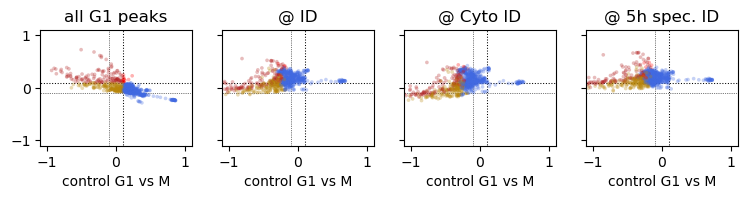

In [41]:
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1, 4,figsize=(9, 1.5),sharey=True)

sns.scatterplot(data=df, x="change_G1vM_all", y="change_dG1vM_all",ax=ax1,alpha=0.3,legend=False,s=7,edgecolor='k',linewidth=0.001,color=df['colour'])
sns.scatterplot(data=df, x="change_G1vM_id", y="change_dG1vM_id",ax=ax2,alpha=0.3,legend=False,s=7,edgecolor='k',linewidth=0.001,color=df['colour'])
sns.scatterplot(data=df, x="change_G1vM_cyto", y="change_dG1vM_cyto",ax=ax3,alpha=0.3,legend=False,s=7,edgecolor='k',linewidth=0.001,color=df['colour'])
sns.scatterplot(data=df, x="change_G1vM_5h", y="change_dG1vM_5h", ax=ax4,alpha=0.3,legend=False,s=7,edgecolor='k',linewidth=0.001,color=df['colour'])


ax1.set_xlabel('control G1 vs M')

for ax in ax1,ax2,ax3,ax4:
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    
    ax.vlines(0.1,-1.5,1.5,color='k',linestyle=':',linewidth=0.75,zorder=0)
    ax.vlines(-0.1,-1.5,1.5,color='k',linestyle=':',linewidth=0.5,zorder=0)
    ax.hlines(0.1,-1.5,1.5,color='k',linestyle=':',linewidth=0.75,zorder=0)
    ax.hlines(-0.1,-1.5,1.5,color='k',linestyle=':',linewidth=0.5,zorder=0)
    ax.set_ylabel('',visible=False)
    ax.set_xlabel('control G1 vs M')

#ax.hlines(0,-0.8,0.8,color='k',linestyle=':',zorder=0)
ax1.set_ylabel('delta G1 vs M')
ax1.set_title('all G1 peaks')
ax2.set_title('@ ID')
ax3.set_title('@ Cyto ID')
ax4.set_title('@ 5h spec. ID')

#plt.savefig('.pdf',dpi=300,bbox_inches='tight')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


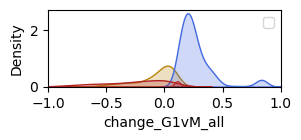

In [42]:
fig, ax = plt.subplots(figsize=(3, 1))

sns.kdeplot(data=df,x='change_G1vM_all',
            fill=True,alpha=0.25,
            hue='colour',palette=['firebrick','royalblue','darkgoldenrod','red'],ax=ax)

ax.set_xlim(-1,1)
ax.legend()


In [43]:

#motifs=['MA0139.1','MA0655.1','MA0095.3','MA0088.2','MA0748.2','MA0079.5','MA0108.2','MA0003.4','MA0090.3','MA0039.4']
motifs=['MA0655.1','MA0108.2','MA0003.4','MA0748.2','MA0095.3','MA0139.1']

df2=df[df['motif_id'].isin(motifs)].reset_index()
df2['label']=df2.index
df2


,index,name,motif_id,cluster,total_tfbs_all,total_tfbs_id,total_tfbs_5h,total_tfbs_cyto,Mp_all,Mp_id,...,Mv_G1,Mv_G1_id,Mv_G1_5h,Mv_G1_cyto,Mv_dG1,Mv_dG1_id,Mv_dG1_5h,Mv_dG1_cyto,colour,label
0,22,TBP,MA0108.2,C_TBP,16474,2062,1114,955,0.16541,0.31615,...,-0.275251,0.036415,-0.041783,0.107199,0.048245,-0.138188,-0.186769,-0.095760,royalblue,0
1,30,CTCF,MA0139.1,C_CTCF,54172,5784,2958,2837,0.27640,0.57245,...,-0.126022,0.151429,0.152244,0.151804,-0.166813,-0.094424,-0.161889,-0.033776,red,1
2,115,JDP2,MA0655.1,C_FOSL1::JUN,46183,4375,2477,1909,0.22999,0.47358,...,-0.545773,-0.346107,-0.380346,-0.307023,0.198401,-0.057716,-0.075015,-0.038301,royalblue,2
3,658,TFAP2A,MA0003.4,C_TFAP2C,48583,6562,3328,3253,0.27942,0.52179,...,0.103868,0.314661,0.308159,0.320914,0.028628,0.069933,-0.026023,0.154001,darkgoldenrod,3
4,662,YY2,MA0748.2,C_YY2,11398,2020,1063,966,0.50219,0.77381,...,0.315093,0.461794,0.477811,0.445568,-0.516996,-0.298088,-0.349461,-0.245108,firebrick,4
5,749,Yy1,MA0095.3,C_Yy1,31935,3902,2156,1763,0.17553,0.33658,...,-0.151090,0.135769,0.108488,0.164754,-0.270099,-0.337565,-0.371512,-0.300850,red,5


Text(0.5, 1.0, 'all @ 5h spec. ID')

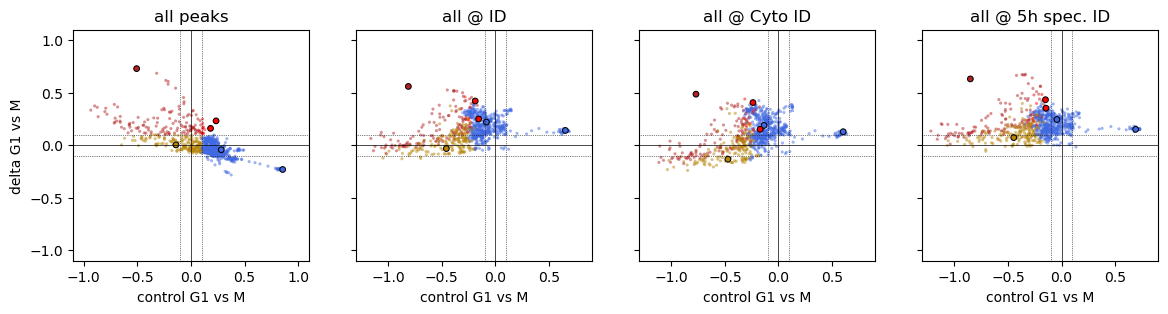

In [44]:
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1, 4,figsize=(14, 3),sharey=True)

sns.scatterplot(data=df, x="change_G1vM_all", y="change_dG1vM_all",ax=ax1,alpha=0.5,legend=False,s=5,edgecolor='none',linewidth=0.001,color=df['colour'])
sns.scatterplot(data=df, x="change_G1vM_id", y="change_dG1vM_id",ax=ax2,alpha=0.5,legend=False,s=5,edgecolor='none',linewidth=0.001,color=df['colour'])
sns.scatterplot(data=df, x="change_G1vM_cyto", y="change_dG1vM_cyto",ax=ax3,alpha=0.5,legend=False,s=5,edgecolor='none',linewidth=0.001,color=df['colour'])
sns.scatterplot(data=df, x="change_G1vM_5h", y="change_dG1vM_5h", ax=ax4,alpha=0.5,legend=False,s=5,edgecolor='none',linewidth=0.001,color=df['colour'])

sns.scatterplot(data=df2, x="change_G1vM_all", y="change_dG1vM_all",ax=ax1,alpha=1,legend=False,s=17,edgecolor='k',linewidth=0.75,color=df2['colour'])
sns.scatterplot(data=df2, x="change_G1vM_id", y="change_dG1vM_id",ax=ax2,alpha=1,legend=False,s=17,edgecolor='k',linewidth=0.75,color=df2['colour'])
sns.scatterplot(data=df2, x="change_G1vM_cyto", y="change_dG1vM_cyto",ax=ax3,alpha=1,legend=False,s=17,edgecolor='k',linewidth=0.75,color=df2['colour'])
sns.scatterplot(data=df2, x="change_G1vM_5h", y="change_dG1vM_5h", ax=ax4,alpha=1,legend=False,s=17,edgecolor='k',linewidth=0.75,color=df2['colour'])

# df2[['change_G1vM_all','change_dG1vM_all','label']].apply(lambda x: ax1.text(*x),axis=1)
# df2[['change_G1vM_id','change_dG1vM_id','label']].apply(lambda x: ax2.text(*x),axis=1)
# df2[['change_G1vM_cyto','change_dG1vM_cyto','label']].apply(lambda x: ax3.text(*x),axis=1)
# df2[['change_G1vM_5h','change_dG1vM_5h','label']].apply(lambda x: ax4.text(*x),axis=1)

ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(-1.1,1.1)
ax1.vlines([-0.1,0.1],-1.1,1.1,color='k',linestyle=':',linewidth=0.5)
ax1.hlines([-0.1,0.1],-1.1,1.1,color='k',linestyle=':',linewidth=0.5)
ax1.vlines([0],-1.1,1.1,color='k',linestyle='-',linewidth=0.5)
ax1.hlines([0],-1.1,1.1,color='k',linestyle='-',linewidth=0.5)
ax1.set_xlabel('control G1 vs M')
ax1.set_xticks([-1,-0.5,0,0.5,1])

for ax in ax2,ax3,ax4:
    ax.set_xlim(-1.3,0.9)
    ax.set_ylim(-1.1,1.1)
    ax.vlines([-0.1,0.1],-1.1,1.1,color='k',linestyle=':',linewidth=0.5)
    ax.hlines([-0.1,0.1],-1.3,0.9,color='k',linestyle=':',linewidth=0.5)
    ax.vlines([0],-1.1,1.1,color='k',linestyle='-',linewidth=0.5)
    ax.hlines([0],-1.3,0.9,color='k',linestyle='-',linewidth=0.5)
    ax.set_ylabel('',visible=False)
    ax.set_xlabel('control G1 vs M')

#ax.hlines(0,-0.8,0.8,color='k',linestyle=':',zorder=0)
ax1.set_ylabel('delta G1 vs M')
ax1.set_title('all peaks')
ax2.set_title('all @ ID')
ax3.set_title('all @ Cyto ID')
ax4.set_title('all @ 5h spec. ID')

#plt.savefig('.pdf',dpi=300,bbox_inches='tight')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


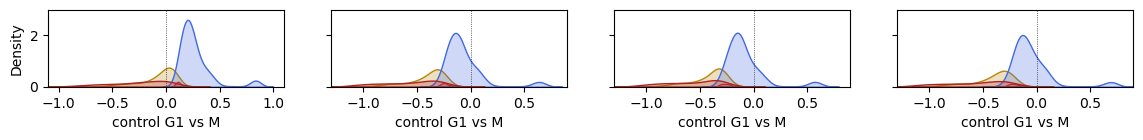

In [45]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(14, 1),sharey=True)


sns.kdeplot(data=df,x='change_G1vM_all',
            fill=True,alpha=0.25,
            hue='colour',palette=['firebrick','royalblue','darkgoldenrod','red'],ax=ax1,common_norm=True)
sns.kdeplot(data=df,x='change_G1vM_id',
            fill=True,alpha=0.25,
            hue='colour',palette=['firebrick','royalblue','darkgoldenrod','red'],ax=ax2,common_norm=True)
sns.kdeplot(data=df,x='change_G1vM_cyto',
            fill=True,alpha=0.25,
            hue='colour',palette=['firebrick','royalblue','darkgoldenrod','red'],ax=ax3,common_norm=True)
sns.kdeplot(data=df,x='change_G1vM_5h',
            fill=True,alpha=0.25,
            hue='colour',palette=['firebrick','royalblue','darkgoldenrod','red'],ax=ax4,common_norm=True)

ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(0,3)
ax1.set_xlabel('control G1 vs M')
ax1.set_xticks([-1,-0.5,0,0.5,1])
ax1.vlines(0,0,4.5,color='k',linestyle=':',linewidth=0.5)
ax1.legend().set_visible(False)

for ax in ax2,ax3,ax4:
    ax.set_xlim(-1.3,0.9)
    ax.set_ylabel('',visible=False)
    ax.set_xlabel('control G1 vs M')
    ax.set_xticks([-1,-0.5,0,0.5])
    ax.vlines(0,0,4.5,color='k',linestyle=':',linewidth=0.5)
    ax.legend().set_visible(False)

#plt.savefig('.pdf',dpi=300,bbox_inches='tight')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


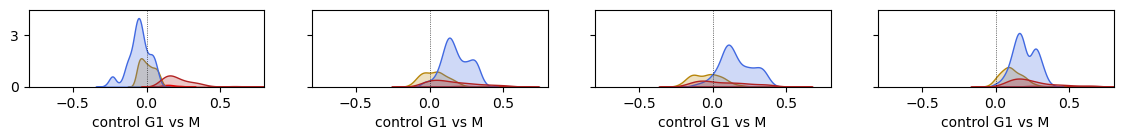

In [46]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(14, 1),sharey=True)


sns.kdeplot(data=df,x='change_dG1vM_all',
            fill=True,alpha=0.25,
            hue='colour',palette=['firebrick','royalblue','darkgoldenrod','red'],common_norm=True,ax=ax1)
sns.kdeplot(data=df,x='change_dG1vM_id',
            fill=True,alpha=0.25,
            hue='colour',palette=['firebrick','royalblue','darkgoldenrod','red'],ax=ax2,common_norm=True)
sns.kdeplot(data=df,x='change_dG1vM_cyto',
            fill=True,alpha=0.25,
            hue='colour',palette=['firebrick','royalblue','darkgoldenrod','red'],ax=ax3,common_norm=True)
sns.kdeplot(data=df,x='change_dG1vM_5h',
            fill=True,alpha=0.25,
            hue='colour',palette=['firebrick','royalblue','darkgoldenrod','red'],ax=ax4,common_norm=True)

for ax in ax1,ax2,ax3,ax4:
    ax.set_xlim(-0.8,0.8)
    ax1.set_ylim(0,4.5)
    ax.set_ylabel('',visible=False)
    ax.set_xlabel('control G1 vs M')
    ax.set_xticks([-0.5,0,0.5])
    ax.legend().set_visible(False)
    ax.vlines(0,0,4.5,color='k',linestyle=':',linewidth=0.5)
    ax.set_yticks([0,3])
    
#plt.savefig('.pdf',dpi=300,bbox_inches='tight')


In [47]:
m1=df[['Mp_all']].copy()
m1['cat']='m1'
m1=m1.rename(columns={'Mp_all':'score'})
m2=df[['Mp_id']].copy()
m2['cat']='m2'
m2=m2.rename(columns={'Mp_id':'score'})
m3=df[['Mp_cyto']].copy()
m3['cat']='m3'
m3=m3.rename(columns={'Mp_cyto':'score'})

mg1=df[['mGp_all']].copy()
mg1['cat']='mg1'
mg1=mg1.rename(columns={'mGp_all':'score'})
mg2=df[['mGp_id']].copy()
mg2['cat']='mg2'
mg2=mg2.rename(columns={'mGp_id':'score'})
mg3=df[['mGp_cyto']].copy()
mg3['cat']='mg3'
mg3=mg3.rename(columns={'mGp_cyto':'score'})

pg1=df[['pGp_all']].copy()
pg1['cat']='pg1'
pg1=pg1.rename(columns={'pGp_all':'score'})
pg2=df[['pGp_id']].copy()
pg2['cat']='pg2'
pg2=pg2.rename(columns={'pGp_id':'score'})
pg3=df[['pGp_cyto']].copy()
pg3['cat']='pg3'
pg3=pg3.rename(columns={'pGp_cyto':'score'})

scores_all=pd.concat([m1, mg1,pg1], axis=0)
scores_id=pd.concat([m2, mg2,pg2], axis=0)
scores_cyto=pd.concat([m3, mg3,pg3], axis=0)

m=pd.concat([m1, m2,m3], axis=0)
mg=pd.concat([mg1, mg2,mg3], axis=0)
pg=pd.concat([pg1, pg2,pg3], axis=0)
tout=pd.concat([m, mg,pg], axis=0)

m

,score,cat
0,0.34859,m1
1,0.33392,m1
2,0.16866,m1
3,0.13774,m1
4,0.16351,m1
...,...,...
836,0.78937,m3
837,0.56909,m3
838,0.39399,m3
839,0.61301,m3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


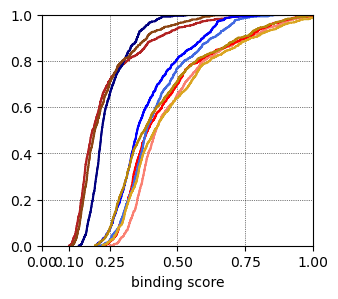

In [48]:
fig, ax = plt.subplots(figsize=(3.5, 3))

colours=['saddlebrown','darkgoldenrod','goldenrod','navy','blue','royalblue','firebrick','red','salmon']

sns.ecdfplot(data=tout, x="score", hue="cat", palette=colours,
             stat="proportion",ax=ax)


ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('',visible=False)
ax.set_xlabel('binding score')
ax.set_xticks([0,0.1,0.25,0.5,0.75,1.0])
#ax.set_xticklabels('')
ax.legend().set_visible(False)
ax.vlines([0.25,0.5,0.75],0,8.5,color='k',linestyle=':',linewidth=0.5,zorder=0)
ax.hlines([0.2,0.4,0.6,0.8],0,8.5,color='k',linestyle=':',linewidth=0.5,zorder=0)

#plt.savefig('_ecdf.pdf',dpi=300,bbox_inches='tight')
